<a href="https://colab.research.google.com/github/DanielFadlon/AIforHealthcare-ObjectDetection/blob/main/proj1_ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
source_liver_dir = './Task03_Liver'
gdrive_liver_dir = 'drive/MyDrive/AIforHealthcare/objectDetection/Task03_Liver'

In [30]:
!pip install gdown
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
def download_data():
  !gdown --id 1nz2ouq1ghOEku-M266EjTYGBQm1DH9Rr

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nz2ouq1ghOEku-M266EjTYGBQm1DH9Rr
To: /content/LiverData.tar
100% 28.9G/28.9G [04:44<00:00, 102MB/s]


In [49]:
import tarfile
import shutil
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from google.colab import drive
import json

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def save_data():
  download_data()
  with tarfile.open('./LiverData.tar') as tar:
    tar.extractall(path='.')

  shutil.copytree(source_liver_dir, gdrive_liver_dir)

## Load Data

In [52]:
def load_data():
  try:
    # Open the saved JSON file from drive
    with open(f'{gdrive_liver_dir}/dataset.json', 'r') as f:
      data = json.load(f)
      return data
  except FileNotFoundError:
    save_data()
    with open(f'{source_liver_dir}/dataset.json', 'r') as f:
      data = json.load(f)
      return data

data = load_data()

## Data Description

In [53]:
for key, value in data.items():
  if key != 'training' and key != 'test':
    print(f'{key}: {value}')

name: Liver
description: Liver, and cancer segmentation
reference: xxxx
licence: CC-BY-SA 4.0
release: 1.0 04/05/2018
tensorImageSize: 3D
modality: {'0': 'CT'}
labels: {'0': 'background', '1': 'liver', '2': 'cancer'}
numTraining: 131
numTest: 70


In [54]:
train_data = data.get('training')
test_data = data.get('test')

In [55]:
df = pd.DataFrame(train_data)

In [56]:
df.head()

,image,label
0,./imagesTr/liver_14.nii.gz,./labelsTr/liver_14.nii.gz
1,./imagesTr/liver_69.nii.gz,./labelsTr/liver_69.nii.gz
2,./imagesTr/liver_77.nii.gz,./labelsTr/liver_77.nii.gz
3,./imagesTr/liver_120.nii.gz,./labelsTr/liver_120.nii.gz
4,./imagesTr/liver_18.nii.gz,./labelsTr/liver_18.nii.gz


In [60]:
def plot_image(path_in_dir, dir=gdrive_liver_dir):
  # Load the image
  image = nib.load(f'{dir}{path_in_dir}')

  # Get the image data as a numpy array
  data = image.get_fdata()

  # Select a slice (for example, the middle slice)
  slice_index = data.shape[2] // 2  # we choose the middle slice
  slice_data = data[:, :, slice_index]

  # Display the slice
  plt.imshow(slice_data.T, cmap='gray', origin='lower')
  plt.show()

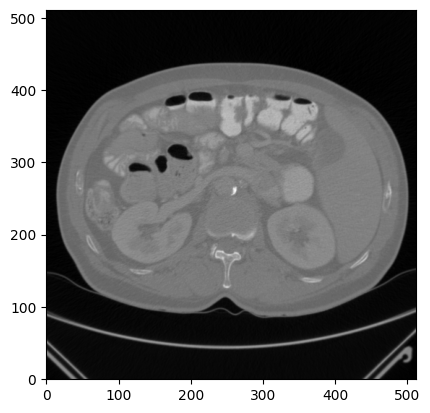

In [61]:
plot_image('/imagesTr/liver_14.nii.gz')

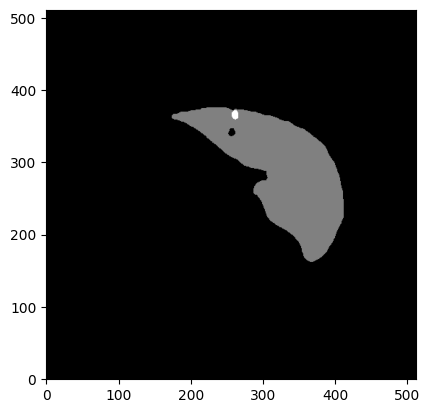

In [62]:
plot_image('/./labelsTr/liver_120.nii.gz')